# Attributes Analysis

Here, we will find:
1. Description of the column
2. Aggregation of the items the dictionaries have and their analysis

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

In [2]:
X_dataframe = pd.read_csv("../data/X_dataframe.csv")
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,NaN,NaN,1,1441485773000,0,1,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,NaN,NaN,1,1443290910000,0,1,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,NaN,NaN,1,1441843027000,0,1,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,NaN,NaN,1,1443466076000,0,1,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,NaN,NaN,1,1440454040000,0,1,True


In [3]:
X_dataframe["attributes"].describe()

count     90000
unique     3118
top          []
freq      78850
Name: attributes, dtype: object

In [4]:
X_dataframe["attributes"].value_counts()

attributes
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [6]:
import ast

X_dataframe["attributes"] = X_dataframe["attributes"].apply(ast.literal_eval)

## Name

In [16]:
attributes_names = [
    m["name"]
    for attributes in X_dataframe["attributes"]
    if attributes
    for m in attributes
]
attributes_names = list(set(attributes_names))
attributes_names

['Alarma de seguridad',
 'Hasta',
 'Juegos infantiles',
 'Televisión',
 'Climatizador automático',
 'Operación',
 'Faros antinieblas delanteros',
 'Cochera',
 'Aire acondicionado',
 'Nombre del tiempo compartido',
 'Luz de lectura',
 'Alarma de luces encendidas',
 'Entrada auxiliar',
 'Agua corriente',
 'Estar',
 'Asiento acompañante regulable en altura',
 'Piso',
 'Cinturones inerciales delanteros',
 'Voltaje Nominal',
 'Cantidad de cuotas',
 'Superficie construible',
 'Techo corredizo',
 'Wifi',
 'Caja de CD',
 'Estado del inmueble',
 'Airbag conductor',
 'Expensas ($)',
 'Laundry',
 'Ambientes del casco',
 'Bebederos',
 'Comando satelital de stereo',
 'Tanque de agua',
 'Disposición',
 'Sala de reuniones',
 'Cancha de basquet',
 'Bar',
 'Lavadero',
 'Número de pieza',
 'Antigüedad',
 'Check in',
 'Control de velocidad de crucero',
 'Largo',
 'Grupo eletrógeno',
 'Tiempo',
 'Recaudación mensual ($)',
 'Tipo de cobertura',
 'Tipo de cochera',
 'Control de tracción',
 'Cancha de paddle

In [8]:
len(attributes_names)

300

In [9]:
X_dataframe["attributes"].apply(lambda x: len(x)).value_counts()

attributes
0     78850
2      7651
1      1366
65      783
14      161
3       141
50      101
6        99
52       99
13       93
9        57
78       55
77       47
7        41
41       35
42       33
23       31
8        30
29       29
47       29
38       23
4        20
63       19
15       18
27       18
16       16
39       14
10       13
40       13
75       11
17        9
73        8
22        8
12        8
81        7
48        7
18        5
5         5
20        5
11        4
31        4
64        4
36        4
66        4
54        3
26        3
37        3
19        3
24        2
21        2
46        2
71        2
45        1
67        1
Name: count, dtype: int64

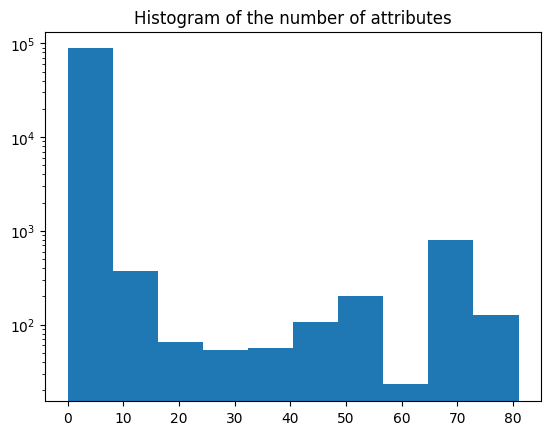

In [58]:
X_dataframe["num_attributes"] = X_dataframe[
    "attributes"
].apply(lambda x: len(x))
# Histogram of the number of attributes
plt.hist(X_dataframe["num_attributes"])
plt.yscale("log")
plt.title("Histogram of the number of attributes")
plt.show()

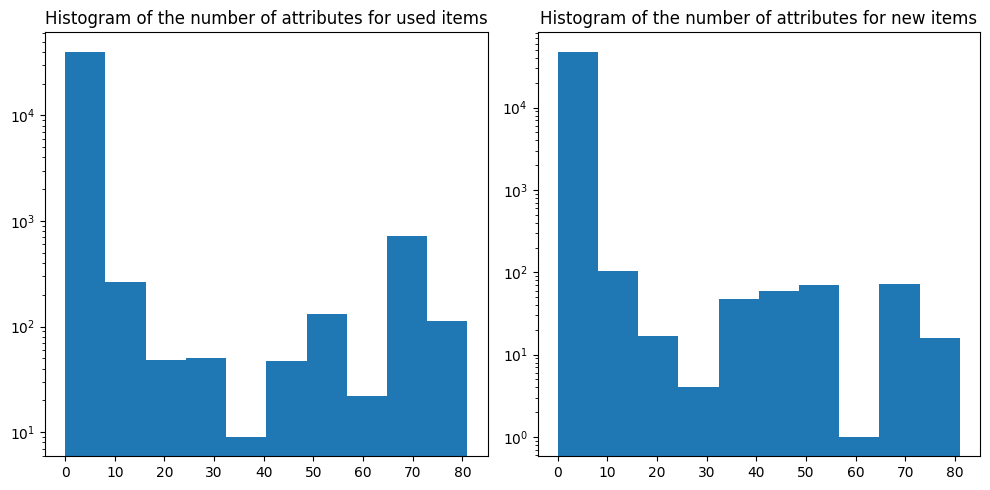

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))   

ax[0].hist(X_dataframe.loc[X_dataframe["used"] == 1]["num_attributes"])
ax[0].set_title("Histogram of the number of attributes for used items")
ax[1].hist(X_dataframe.loc[X_dataframe["used"] == 0]["num_attributes"])
ax[1].set_title("Histogram of the number of attributes for new items")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
plt.tight_layout()
plt.show()


In [67]:
X_dataframe["more_than_2_attributes"] = X_dataframe["num_attributes"] > 2
res = column_analysis("more_than_2_attributes", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
more_than_2_attributes,,,,
True,2133,0.715893,0.696379,0.734631
False,87867,0.456611,0.453319,0.459906


In [68]:
2133/90000

0.0237

#### 💡 Insight:
The **number of attributes** is not a strong predictor of the item’s condition.  
Although the distribution differs slightly when an item has only two attributes, this case is rare (occurs in ~2% of the data), making it unlikely to be useful for the model.

## Attribute group ID

In [20]:
attributes_group_ids = [
    m["attribute_group_id"]
    for methods in X_dataframe["attributes"]
    if methods
    for m in methods
]
attributes_group_ids = list(set(attributes_group_ids))
attributes_group_ids

['ADICIONALES',
 'COMODIDADES',
 'CARACTERISTICAS',
 'FIND',
 'AMBIENTES',
 'DDPLANAHO',
 'EXTERIOR',
 'COMOYAMEN',
 'CONFORT',
 'RANGCUOTA',
 'SECURITY',
 'SONIDO',
 'EQUIPAMIENTO',
 'DFLT']

### Adicionales

In [37]:
def amt_of_adicionales(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "ADICIONALES"])
X_dataframe["attributes_adicionales"] = X_dataframe["attributes"].apply(amt_of_adicionales)
res = column_analysis("attributes_adicionales", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_adicionales,,,,
20,1,1.000000,0.206543,1.000000
13,5,1.000000,0.565509,1.000000
14,7,1.000000,0.645661,1.000000
17,1,1.000000,0.206543,1.000000
24,37,0.972973,0.861756,0.995213
15,11,0.909091,0.622635,0.983768
4,887,0.875986,0.852660,0.896070
19,38,0.842105,0.695829,0.925562
18,18,0.833333,0.607775,0.941635


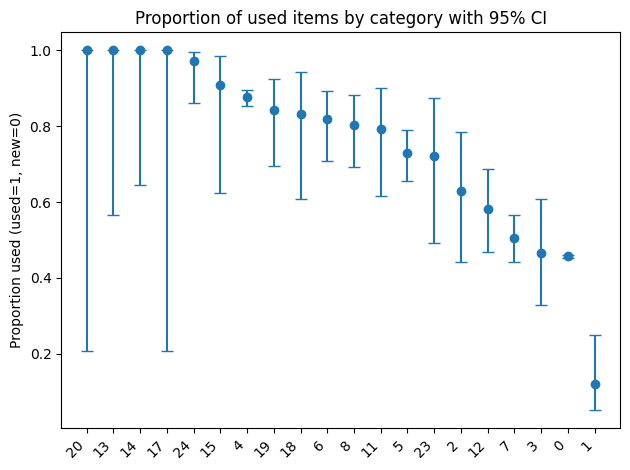

In [38]:
X_dataframe["attributes_adicionales_obj"] = X_dataframe["attributes_adicionales"].astype(object)
res = column_analysis("attributes_adicionales_obj", X_dataframe)
plot_column_analysis(res)

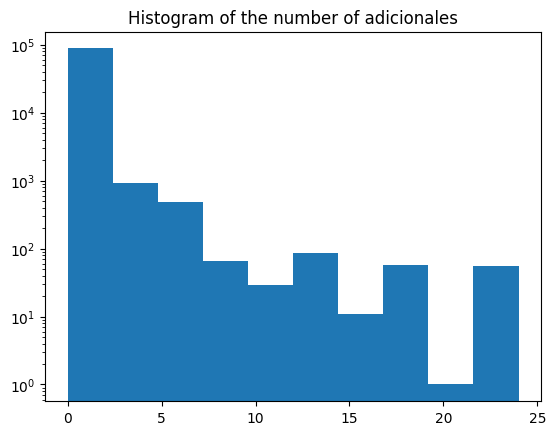

In [39]:
plt.hist(X_dataframe["attributes_adicionales"])
plt.title("Histogram of the number of adicionales")
plt.yscale("log")
plt.show()


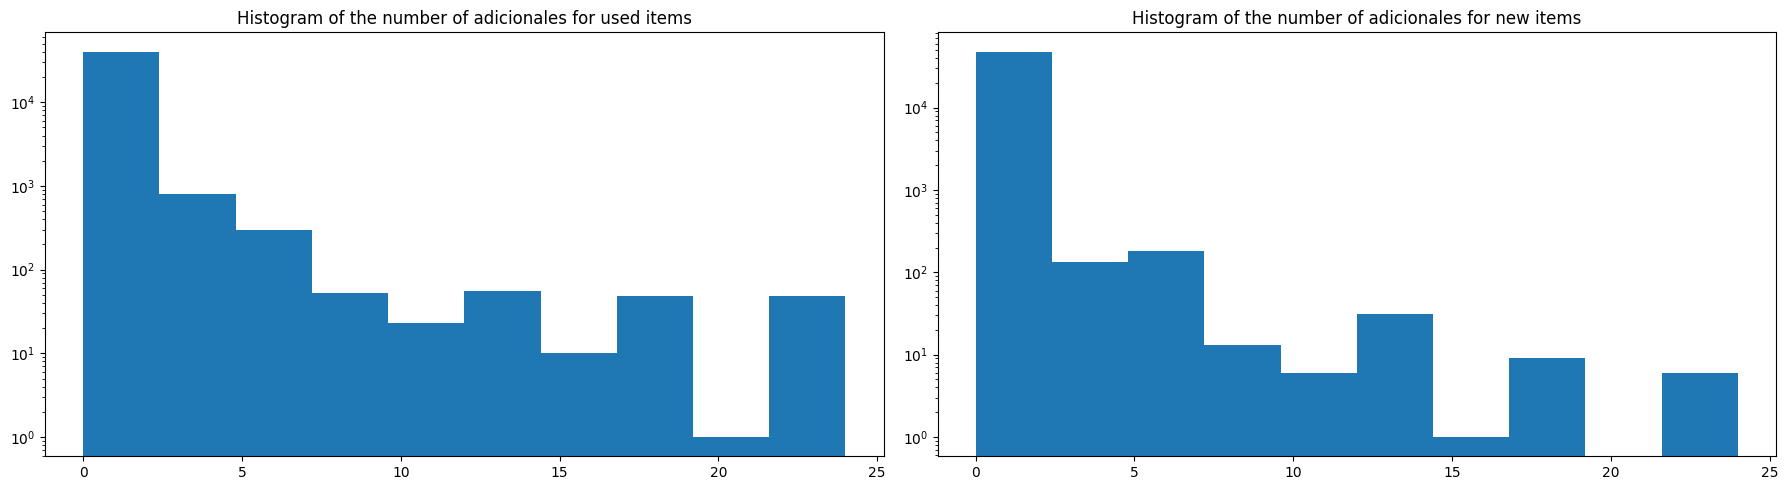

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

ax[0].hist(X_dataframe.loc[X_dataframe["used"] == 1]["attributes_adicionales"])
ax[0].set_title("Histogram of the number of adicionales for used items")
ax[0].set_yscale("log")

ax[1].hist(X_dataframe.loc[X_dataframe["used"] == 0]["attributes_adicionales"])
ax[1].set_title("Histogram of the number of adicionales for new items")
ax[1].set_yscale("log")

plt.tight_layout()
plt.show()


In [29]:
pearson_corr = X_dataframe[["used", "attributes_adicionales"]].corr(method="pearson")
spearman_corr = X_dataframe[["used", "attributes_adicionales"]].corr(method="spearman")
kendall_corr = X_dataframe[["used", "attributes_adicionales"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)


Pearson correlation:                              used  attributes_adicionales
used                    1.000000                0.070167
attributes_adicionales  0.070167                1.000000
Spearman correlation:                              used  attributes_adicionales
used                    1.000000                0.085011
attributes_adicionales  0.085011                1.000000
Kendall correlation:                              used  attributes_adicionales
used                    1.000000                0.084708
attributes_adicionales  0.084708                1.000000


#### 💡 Insight:
Almost no information

### COMODIDADES

In [30]:
def amt_of_comodidades(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "COMODIDADES"])


X_dataframe["attributes_comodidades"] = X_dataframe["attributes"].apply(
    amt_of_comodidades
)
res = column_analysis("attributes_comodidades", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_comodidades,,,,
7,1,1.000000,0.206543,1.000000
9,2,1.000000,0.342372,1.000000
12,1,1.000000,0.206543,1.000000
17,6,1.000000,0.609657,1.000000
19,8,1.000000,0.675584,1.000000
15,7,0.857143,0.486865,0.974321
29,47,0.851064,0.723141,0.925934
36,12,0.833333,0.551964,0.953036
14,158,0.740506,0.667020,0.802575


Too much 0s in attributes_comodidades

### CARACTERISTICAS

In [42]:
def amt_of_caracteristicas(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "CARACTERISTICAS"])


X_dataframe["attributes_caracteristicas"] = X_dataframe["attributes"].apply(
    amt_of_caracteristicas
)
res = column_analysis("attributes_caracteristicas", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_caracteristicas,,,,
1,1,1.000000,2.065433e-01,1.000000
7,5,1.000000,5.655085e-01,1.000000
12,1,1.000000,2.065433e-01,1.000000
14,23,1.000000,8.568789e-01,1.000000
5,88,0.988636,9.384036e-01,0.997991
13,18,0.888889,6.719976e-01,0.968981
20,9,0.888889,5.649938e-01,0.980110
16,7,0.714286,3.589291e-01,0.917783
0,89790,0.462212,4.589524e-01,0.465475


#### 💡 Insight:
Too much 0s

### FIND

In [43]:
def amt_of_find(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "FIND"])


X_dataframe["attributes_find"] = X_dataframe["attributes"].apply(
    amt_of_find
)
res = column_analysis("attributes_find", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_find,,,,
12,6,1.000000,0.609657,1.000000
6,142,0.964789,0.920224,0.984868
8,824,0.905340,0.883428,0.923489
11,47,0.765957,0.627755,0.863969
5,14,0.714286,0.453505,0.882788
4,34,0.676471,0.508426,0.808685
13,3,0.666667,0.207655,0.938510
9,230,0.639130,0.575247,0.698442
10,300,0.630000,0.574044,0.682669


In [44]:
X_dataframe["attributes_find_bool"] = X_dataframe["attributes_find"].apply(lambda x: 1 if x > 1 else 0)
res = column_analysis("attributes_find_bool", X_dataframe)
display(res)


,n,prop_used,ci_lower,ci_upper
attributes_find_bool,,,,
1,1979,0.771602,0.752590,0.789561
0,88021,0.455812,0.452523,0.459104


#### 💡 Insight:

Too much values in 0 and 1, where the p is not conclusive

### AMBIENTES

In [45]:
def amt_of_ambientes(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "AMBIENTES"])


X_dataframe["attributes_ambientes"] = X_dataframe["attributes"].apply(
    amt_of_ambientes
)
res = column_analysis("attributes_ambientes", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_ambientes,,,,
17,12,0.916667,0.646114,0.985135
1,29,0.896552,0.736146,0.964186
16,164,0.737805,0.665599,0.799125
20,149,0.724832,0.648153,0.790210
18,11,0.545455,0.280088,0.787290
0,89509,0.462009,0.458745,0.465277
15,59,0.338983,0.231375,0.466278
14,32,0.062500,0.017310,0.201475
13,35,0.000000,0.000000,0.098904


#### 💡 Insight:

Too much 0s

### DDPLANAHO

In [46]:
def amt_of_ddplanaho(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "DDPLANAHO"])


X_dataframe["attributes_ddplanaho"] = X_dataframe["attributes"].apply(amt_of_ddplanaho)
res = column_analysis("attributes_ddplanaho", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_ddplanaho,,,,
0,89989,0.462812,4.595560e-01,0.466071
3,11,0.000000,2.775558e-17,0.258840


### EXTERIOR

In [47]:
def amt_of_exterior(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "EXTERIOR"])


X_dataframe["attributes_exterior"] = X_dataframe["attributes"].apply(amt_of_exterior)
res = column_analysis("attributes_exterior", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_exterior,,,,
2,1,1.000000,0.206543,1.000000
3,40,0.975000,0.871183,0.995573
4,787,0.908513,0.886338,0.926720
0,89172,0.458586,0.455317,0.461858


### COMOYAMEN

In [48]:
def amt_of_como_yamen(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "COMOYAMEN"])


X_dataframe["attributes_como_yamen"] = X_dataframe["attributes"].apply(amt_of_como_yamen)
res = column_analysis("attributes_como_yamen", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_como_yamen,,,,
20,9,1.000000,0.700847,1.000000
21,12,0.916667,0.646114,0.985135
1,45,0.911111,0.792661,0.964889
14,155,0.729032,0.654151,0.792835
0,89712,0.462279,0.459018,0.465543
13,32,0.062500,0.017310,0.201475
11,35,0.000000,0.000000,0.098904


### CONFORT

In [49]:
def amt_of_confort(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "CONFORTO"])


X_dataframe["attributes_confort"] = X_dataframe["attributes"].apply(amt_of_confort)
res = column_analysis("attributes_confort", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_confort,,,,
0,90000,0.462756,0.4595,0.466015


### RANGCUOTA

In [50]:
def amt_of_rangcuota(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "RANGCUOTA"])


X_dataframe["attributes_rangcuota"] = X_dataframe["attributes"].apply(amt_of_rangcuota)
res = column_analysis("attributes_rangcuota", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_rangcuota,,,,
0,89989,0.462812,4.595560e-01,0.466071
2,11,0.000000,2.775558e-17,0.258840


### SECURITY

In [51]:
def amt_of_security(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "SECURITY"])


X_dataframe["attributes_security"] = X_dataframe["attributes"].apply(amt_of_security)
res = column_analysis("attributes_security", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_security,,,,
4,21,1.000000,0.845356,1.000000
6,1,1.000000,0.206543,1.000000
11,31,1.000000,0.889741,1.000000
17,3,1.000000,0.438494,1.000000
18,803,0.909091,0.887211,0.927075
0,89141,0.458397,0.455128,0.461670


### SONIDO

In [52]:
def amt_of_sonido(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "SONIDO"])


X_dataframe["attributes_sonido"] = X_dataframe["attributes"].apply(amt_of_sonido)
res = column_analysis("attributes_sonido", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_sonido,,,,
2,1,1.000000,0.206543,1.000000
6,1,1.000000,0.206543,1.000000
7,30,1.000000,0.886483,1.000000
11,19,0.947368,0.753608,0.990648
12,787,0.908513,0.886338,0.926720
0,89162,0.458525,0.455256,0.461797


### EQUIPAMIENTO

In [53]:
def amt_of_equipamiento(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "EQUIPAMIENTO"])


X_dataframe["attributes_equipamiento"] = X_dataframe["attributes"].apply(amt_of_equipamiento)
res = column_analysis("attributes_equipamiento", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_equipamiento,,,,
1,3,1.000000,0.438494,1.000000
9,11,1.000000,0.741160,1.000000
0,89986,0.462672,0.459416,0.465931


### DFLT

In [54]:
def amt_of_dflt(x: list) -> int:
    return len([m for m in x if m["attribute_group_id"] == "DFLT"])


X_dataframe["attributes_dflt"] = X_dataframe["attributes"].apply(amt_of_dflt)
res = column_analysis("attributes_dflt", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
attributes_dflt,,,,
0,81187,0.478328,0.474893,0.481765
1,5376,0.343750,0.331169,0.356554
2,3286,0.293974,0.278645,0.309785
3,122,0.000000,0.000000,0.030527
4,17,0.000000,0.000000,0.184324
7,12,0.000000,0.000000,0.242501


In [55]:
X_dataframe["attributes_dflt_bool"] = X_dataframe["attributes_dflt"].apply(lambda x: 1 if x > 0 else 0)
X_dataframe["attributes_dflt_bool"].value_counts()

attributes_dflt_bool
0    81187
1     8813
Name: count, dtype: int64

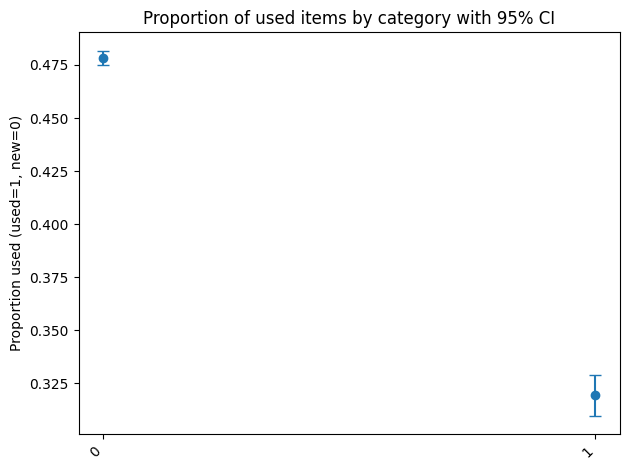

In [56]:
res = column_analysis("attributes_dflt_bool", X_dataframe)
plot_column_analysis(res)

#### 💡 Insight:
Items with `DLFT` in the `attribute_group_id` field exhibit a significantly lower proportion of used items.  
The 95% confidence interval is narrow, which suggests this effect is consistent and stable.  
This makes `attribute_group_id` a potentially valuable feature for the ML model.